Estimating The Period of an Oscillator
======================================

This week we'll be investigating the period of a pendulum. This is a problem that has been studied for a *very* long time (e.g., one of earliest workers in the pendulum field was Galeleo himself!). However, most folks (e.g., physics students) just investigate the low amplitude behavior (when the angle between the pendulum and the vertical is pretty small, say 5 or 10 degrees). We are not going to satisfied with such a simple analysis! No, on the contrary, we'll be looking at how the period of the pendulum *varies* with amplitude. We could use the momentum principle as our startign point for this analsysis, as is usually done, but we're also going to be somewhat unconventional and work instead with the energy principle. Note that this same technique works with any non-linear oscilator (think resonance circuits in electronics, or lasers, or molecules). So, lots to learn! This project has two primary components:

1. Integrating a function, that is not integrable, numerically so that it's integral can be used as part of the analysis of a problem. As we work out the exact expression for the period of a pendulum we'll encounter such a function and we'll integrate it numerically.
    
2. Applying our techniques from last week of fitting functions to data to extract very precise times from a video that we'll collect of the pendulum in motion. This will allow us to compare our analytical approximation and the numerical integral with actual data gathered from a real pendulum.

Let's say we have a system with a potential energy given by some,
possibly complex expression $U(x)$. For any system with position 
$x$ and a potential energy $U$ we have:

\begin{equation}
E = {1 \over 2}m\left(\frac{dx}{dt}\right)^2 + U(x).
\end{equation}

If we solve this for $dx/dt$ we get the result we want:
\begin{equation}
 \frac{dx}{dt} = \sqrt{2(E - U(x))/m}.
\end{equation}
 
or, solving for $dt$ we get:

\begin{equation}
dt = \sqrt{m \over 2 (E-U(x)) } dx.
\end{equation}

If the system is bound we can get the time for one oscillation by
integrating the time for one complete period! If the potential is symmetric
with respect to $x$ then we only have to do 1/4 of a period and multiply
by 4:

\begin{equation}
T = 4 \int_0^{x_{\rm max}} \sqrt{m \over 2 (E-U(x)) } dx.
\end{equation}

Let's apply this idea to the simple pendulum. Use this potential (and use polar coordinates!) to study the simple pendulum:

\begin{equation}
U(\theta) = -mgl {\rm cos}(\theta)
\end{equation}

Use this idea to show that for small
values of $\theta_m$ the result is the same as we got in 
General Physics ($T = 2 \pi \sqrt{l/g}$). You can **watch the slides** for this lesson see how to carry out the expansion to the
next order and find the second order correction to this result.
To do the integral it helps to first use: ${\rm cos}\,\theta = 1 - 2 {\rm sin}^2\,(\theta/2)$ and a similar 
substitution for ${\rm cos}\,\theta_m$. Then change variables to 
${\rm sin}\,\phi = {\rm sin}\,(\theta/2)/
{\rm sin}\,(\theta_m/2)$.Then expand in powers of $\theta_m$ At the
last step before expansion you should have:

\begin{equation}
4 \sqrt {l/g} \int_0^{\pi/2} {d\phi \over {\sqrt{1 - \sin^2\phi \sin^2{\theta_m \over 2}}}}
\end{equation}

The integral here is called the "Complete Elliptic Integral of the First Kind". It's famous. It's impossible to do in closed form.

However we can approximate it in several ways. First, we can evalutate the integral numerically (see Simpon's Rule below) or we can estimate the value of the integral by using a Taylor Expansion WRT a small parameter (in our case the amplitude of the pedulum) to get a series that gives us a correction to the simple theory. We'll do both of these things and comapare the results.

Below is a simple python implementation of [Simpson's Rule.](https://en.wikipedia.org/wiki/Simpson's_rule).


In [1]:
%pylab inline

def simpson(f, a, b, N, args=None):
    """
    Use Simpson's Rule to estimate an integral
    
    f: function to be integrated
    a, b: lower, upper limits
    N: "half the number of samples" to take.
    args: list of additional arguments (besides 'x') for the function.
    """
    if args is None:
        args=[]
    x=linspace(a,b,2*N)  # sample the function
    h=(b-a)/(2*N-1)
    y=f(*([x] +list(args)))
    evens =  y[2:-2:2]
    odds = y[1:-1:2]
    return (y[0] + y[-1] + 2*odds.sum() + 4*evens.sum())*h/3.0

def K_int(phi, m):
    """
    Integrand for K(m,N) below. This defines the 
    "Complete Elliptic Integral of the First Kind".
    """
    return 1.0/sqrt(1-m*sin(phi)**2)

def K(m, N=1000):
    """
    K(m,N) computes the:
    "Complete Elliptic Integral of the First Kind"
    with 2*N samples using the simple Simpson's Rule integrator above.
    """
    return simpson(K_int, 0, pi/2, N=N, args=(m,))


Populating the interactive namespace from numpy and matplotlib


The `scipy.integrate` package has a number of numerical [integrators](https://docs.scipy.org/doc/scipy-0.18.1/reference/integrate.html) that you can study. For the purposes of this example we'll use `quad` which is a simple general purpose integrator. Let's compare that with the Simpson's Rule integrator above.

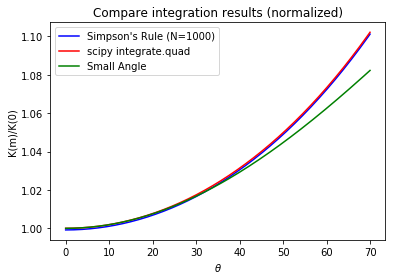

In [2]:
#
# scipy has an easy "built in" integration routine: integrate.quad
# We'll use this as well for comparison.
#

from scipy.integrate import quad  # import a numerical integrator

siList=[]  # scipy integrate.quad list
saList=[]  # small angle list
srList=[]  # Simpson's Rule, N=1000 list

thetArr = linspace(0.0, 70, 150) # range of theta values

for theta in thetArr:
    thetaRad=theta*pi/180.0
    m=sin(thetaRad/2.0)**2
    simpresult = K(m)
    quadResult = quad(K_int, 0, pi/2, args=(m,))
    smallAngle = (pi/2)*(1.0+m/4)
    srList.append(2*simpresult/pi)
    siList.append(2*quadResult[0]/pi)
    saList.append(2*smallAngle/pi)
    
title("Compare integration results (normalized)")
xlabel("$\\theta$")
ylabel("K(m)/K(0)")

plot(thetArr, srList, 'b-', label="Simpson's Rule (N=1000)")
plot(thetArr, siList, 'r-', label="scipy integrate.quad")
plot(thetArr, saList, 'g-', label="Small Angle")
legend(loc=2)

Project 8, Version A
==========

For project 8 we'll take data from a simple pendulum. This year I plan to collect new data. We have enough students that we can divide and conquer to get a significant data set. If you wish to participate in `Version A` please let me know. From that data we'll get experimental values for period. I'd like you to compare those experimental results with a) The small angle analytical results and b) the exact theory using Simpson's Rule. You can find below example code that illustrates the idea. In your project you should show how you:

1. Analyzed the data collected and contributed some data to the full data set
2. Took at least one full cycle of low amplitude data (in the last few seconds of video) to get the right offset for the data you collected and to confirm the low amplitude graph.


Number of data points: 6
fit parameters:track270.csv
-----------------
theta0: -70.64386803043298 +/- 0.06363121426365223
alpha: 8.384606081664476
t0 8.994985147019422 +/- 0.0007581024396897339
K(sin^2(theta0/2) 1.7329560713599583


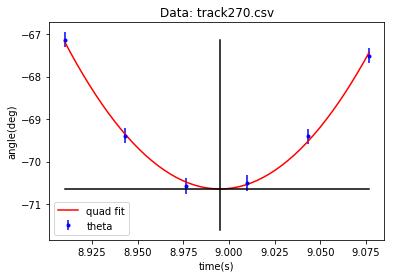

In [3]:
#
# This is an example of getting data out of a video with tracker.
# Note that we can get the angle and the time with the same fit.
# You could use a similar technique with shaft encoder data, or
# you could simply fit large amplitude data with a cos/sin model
# to get the period. Even though the overall fit will not be
# good, the uncertainty in the period would be quite low.
#

import os
import csv
from scipy.optimize import curve_fit  # automated curve fitting

def fQuad(t, theta0, alpha, t0):
    """
    Use a quadratic to fit the angle vs. time
    """
    return theta0 + alpha*(t-t0)**2

fname = 'track270.csv'
dataFile = open(os.path.join('p8-data',fname))
reader = csv.reader(dataFile, delimiter=',')
lineCnt=0
tlist=[]
xlist=[]
ylist=[]
thetaList=[]

for line in reader:
    if lineCnt in [0,1]:
        pass
    else:
        try:
            tlist.append(float(line[0]))
            xlist.append(float(line[1]))  # tracker has x-y backwards for some reason.
            ylist.append(float(line[2]))
            thetaList.append(arctan2(ylist[-1],xlist[-1]))
        except:
            print("Ack!", line)
            
    lineCnt+=1
print("Number of data points:", len(tlist))

tarr=array(tlist)
thArr=array(thetaList)

sigTheta=0.18/58.0*ones(len(tarr)) # ~0.18 cm (1 pixel)  error, r~= 58cm

thDeg=thArr*180/pi     # get theta array in degress for display

theta0e = thArr.sum()/len(thArr)
dt=tarr[1]-tarr[0]
om0 = (thArr[1]-thArr[0])/dt
omf = (thArr[-1]-thArr[-2])/dt
alpha0e = (omf-om0)/(tarr[-1]-tarr[0])
t0e = tarr.sum()/len(tarr)

popt, pcov = curve_fit(fQuad, tarr, thArr, p0=(theta0e, alpha0e, t0e),sigma=sigTheta)

theta0=popt[0]
th0Deg=theta0*180.0/pi         # theta0 in degrees for display
thErr=sqrt(pcov[0,0])*180.0/pi # theta0 error in degrees

alpha=popt[1]
t0=popt[2]
t0Err=sqrt(pcov[2,2])

print("fit parameters:"+fname)
print("-----------------")
print("theta0:", th0Deg,"+/-",thErr)
print("alpha:", alpha)
print("t0", t0,"+/-",t0Err)
print("K(sin^2(theta0/2)", K(sin(theta0/2.0)**2)) # estimate elliptic integral

tstar = linspace(tarr[0],tarr[-1],50)   # range of times for quadratic model
ystar = fQuad(tstar, theta0, alpha, t0) # value of quadratic model
trange = tarr[-1]-tarr[0]               # get range of times
thRange = max(thDeg)-min(thDeg)      # range of displayed angles

title("Data: "+fname)
xlabel("time(s)")
ylabel("angle(deg)")
errorbar(tarr, thArr*180/pi,fmt='b.',yerr=sigTheta*180.0/pi, label="theta")
plot(tstar, ystar*180/pi, 'r-', label="quad fit")
plot([tarr[0],tarr[-1]],[th0Deg,th0Deg],'k-')            # draw horiz. cross hair
plot([t0,t0],[min(thDeg)-0.3*thRange,max(thDeg)],'k-')   # draw vertical cross hair
legend()


56
initial estimates
-----------------
omega0 4.1887902047863905
A0 0.12217304763960307
fit parameters
-----------------
A: -7.494460173587601
omega: 4.1545157853236905 corrected period: 1.5107593646454929 s
phi: 254.2906205754467
offset: -1.155073987745629



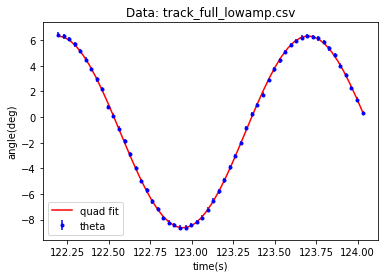

In [4]:
def fPeriodic(t, A, omega, phi, offset):
    """
    Use a quadratic to fit the angle vs. time
    """
    return A*cos(omega*t + phi) + offset

fname = 'track_full_lowamp.csv'
dataFile = open(os.path.join('p8-data',fname))
reader = csv.reader(dataFile, delimiter=',')
lineCnt=0
tlist=[]
xlist=[]
ylist=[]
thetaList=[]

for line in reader:
    if lineCnt in [0,1]:
        pass
    else:
        try:
            tlist.append(float(line[0]))
            xlist.append(float(line[1]))  # tracker has x-y backwards for some reason.
            ylist.append(float(line[2]))
            thetaList.append(arctan2(ylist[-1],xlist[-1]))
        except:
            print("Ack!", line)
            
    lineCnt+=1
print(len(tlist))

tarr=array(tlist)
thArr=array(thetaList)

sigTheta=0.18/58.0*ones(len(tarr)) # ~0.18 cm (1 pixel)  error, r~= 58cm

omega0 = 2*pi/(120.1-118.6)  # estimate omega (from the data)
A0 = (6-(-8))*pi/360.0       # estimate Amplitude ((max-min)/2)*(pi/180)
phi0 = 0                     # estimate phi  (just a guess)
offset0 = 0.0                # estimate offset

print("initial estimates")
print("-----------------")
print("omega0", omega0)
print("A0", A0)

popt, pcov = curve_fit(fPeriodic, tarr, thArr, p0=(A0, omega0, phi0, offset0),sigma=sigTheta)

A=popt[0]
omega=popt[1]
phi=popt[2]
offset=popt[3]
T0 = (2*pi/omega)/(1+(A**2)/16)  # T0 corrected for amplitude effect

print("fit parameters")
print("-----------------")
print("A:", A*180.0/pi)
print("omega:", omega, "corrected period:", T0, "s")
print("phi:", phi*180.0/pi)
print("offset:", offset*180.0/pi)
print()

tstar = linspace(tarr[0],tarr[-1],50)
ystar = fPeriodic(tstar, A, omega, phi, offset)

title("Data: "+fname)
xlabel("time(s)")
ylabel("angle(deg)")
errorbar(tarr, thArr*180/pi, fmt='b.',yerr=sigTheta*180.0/pi, label="theta")
plot(tstar, ystar*180/pi, 'r-', label="quad fit")
legend()


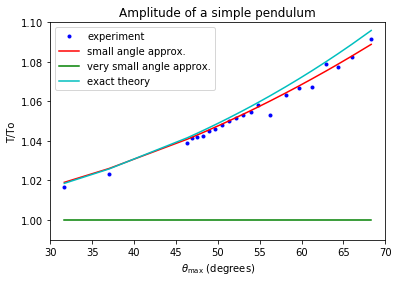

In [5]:
fname = 'raw-data.csv'
dataFile = open(os.path.join('p8-data',fname))
reader = csv.reader(dataFile, delimiter=',')
lineCnt=0
t1_list=[]
t2_list=[]
theta1_list=[]
theta2_list=[]
for line in reader:
    if lineCnt in [0]:
        pass
    else:
        try:
            t1_list.append(float(line[1]))
            theta1_list.append(float(line[2])*pi/180.0)  # convert to radians
            t2_list.append(float(line[3]))
            theta2_list.append(float(line[4])*pi/180.0)  # convert to radians
        except:
            print("Ack!", line)
            
    lineCnt+=1

N=len(t1_list)
t1arr=array(t1_list)
t2arr=array(t2_list)
th1arr=array(theta1_list)+offset # theta 1 corrected for offset
th2arr=array(theta2_list)+offset # theta 2 corrected for offset

ratio = (t2arr-t1arr)/T0     # array of experimental periods devided by zero amplitude period
thAvg = (th1arr+th2arr)/2.0

vsaa = 1.0*ones(N)
saa = 1.0+thAvg*thAvg/16
sraList=[]
for theta in thAvg:
    sraList.append(2*K(sin(theta/2.0)**2)/pi)

thDeg=thAvg*180/pi


  # array of average amplitudes (in radians)

title("Amplitude of a simple pendulum")
xlabel("$\\theta_{\\rm max}$ (degrees)")
ylabel("T/To")
axis([30,70,0.99,1.1])
plot(thDeg, ratio,'b.', label="experiment")
plot(thDeg, saa, 'r-',label="small angle approx.")
plot(thDeg, vsaa, 'g-', label="very small angle approx.")
plot(thDeg, sraList, 'c-', label="exact theory")
legend(loc=2)

Project 8, Version B
==========

Find any application you like of numerical integration. Use either the Simpson's Rule integrator above, or one of the built-in scipy integrators (e.g., quad) to numerically evaluate the integral. Find some way to validate your code. Either take a simple case where you can compare to an analytical integration, or use "real" data to show that your code is producing something reasonable.


